In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meat-production-datasets1961-2018/energy-efficiency-of-meat-and-dairy-production.csv
/kaggle/input/meat-production-datasets1961-2018/meat-supply-per-person.csv
/kaggle/input/meat-production-datasets1961-2018/meat-consumption-vs-gdp-per-capita.csv
/kaggle/input/meat-production-datasets1961-2018/animals-slaughtered-for-meat.csv
/kaggle/input/meat-production-datasets1961-2018/beef-and-buffalo-meat-production-tonnes.csv
/kaggle/input/meat-production-datasets1961-2018/chicken-meat-production.csv
/kaggle/input/meat-production-datasets1961-2018/egg-yield-per-bird.csv
/kaggle/input/meat-production-datasets1961-2018/global-meat-production.csv
/kaggle/input/meat-production-datasets1961-2018/pigmeat-production-tonnes.csv
/kaggle/input/meat-production-datasets1961-2018/poultry-production-tonnes.csv
/kaggle/input/meat-production-datasets1961-2018/meat-production-tonnes.csv
/kaggle/input/meat-production-datasets1961-2018/protein-efficiency-of-meat-and-dairy-production.csv
/kaggle/input

In [2]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
animals = pd.read_csv('../input/meat-production-datasets1961-2018/animals-slaughtered-for-meat.csv')
del animals['Code']

animals

,Entity,Year,Cattle (cattle slaughtered),Goats (goats slaughtered),Chicken (chicken slaughtered),Turkey (turkeys slaughtered),Pigs (pigs slaughtered),Sheep (sheeps slaughtered)
0,Afghanistan,1961,360000.0,940000.0,7000000.0,NaN,NaN,4336000.0
1,Afghanistan,1962,384000.0,875000.0,7500000.0,NaN,NaN,4355000.0
2,Afghanistan,1963,396000.0,810000.0,7700000.0,NaN,NaN,4673000.0
3,Afghanistan,1964,402000.0,750000.0,8000000.0,NaN,NaN,5010000.0
4,Afghanistan,1965,408000.0,875000.0,8500000.0,NaN,NaN,5179000.0
...,...,...,...,...,...,...,...,...
13532,Zimbabwe,2014,432942.0,2040000.0,50000000.0,27000.0,378000.0,28000.0
13533,Zimbabwe,2015,501747.0,1728852.0,53000000.0,27000.0,389422.0,27271.0
13534,Zimbabwe,2016,491611.0,1479437.0,58000000.0,28000.0,380286.0,27432.0
13535,Zimbabwe,2017,474251.0,2101765.0,60000000.0,28000.0,316036.0,30665.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == "":


Text(0, 0.5, 'Cattle slaughtered, Millions')

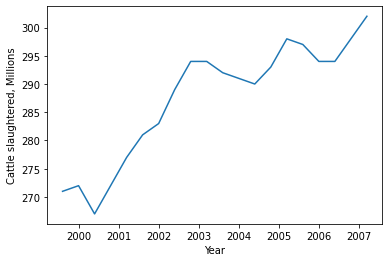

In [4]:
animals.set_index("Year", inplace = True)
animals.groupby([animals.index])

world_data = animals.loc[animals['Entity'].str.contains("World", case=False)]

last_10yrs = world_data.tail(20)

cows = (last_10yrs['Cattle (cattle slaughtered)'] / 1000000).round(0)

graph = sns.lineplot(data = cows)

graph.set_xticklabels(cows.index)
graph.set_ylabel('Cattle slaughtered, Millions')
